In [2]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#simulate battling risk to see if you should attack or defend in the long run

class die:
  def __init__(self,name,sides=6):
    self.sides = sides
    self.name = name
    
def roll(die_to_roll):
    """Pass in a list of die to roll and get results back in ordered list"""
    
    results = []
    names = []
    for die in die_to_roll:
        val = np.random.choice(np.arange(1,die.sides+1))
        results.append(val)
    return results

In [4]:
#define our dice
atk1 = die('atk1')
atk2 = die('atk2')
atk3 = die('atk3')
def1 = die('def1')
def2 = die('def2')

In [5]:
#test rolling the dice
all_dice = [atk1,atk2,atk3,def1,def2]
roll(all_dice)

[6, 1, 5, 6, 1]

In [6]:
def multi_roll(dice,rolls=1):
    """Rolls Risk Die a number of times, outputs a dataframe containing the results cumulative sum of the results"""
    all_results = []
    names = []
    for die in dice:
        names.append(die.name)
    for each_roll in np.arange(rolls):
        all_results.append(roll(dice))
    
    df = pd.DataFrame(all_results, columns = names)
    
    df['max_def'] = np.max(df[['def1','def2']], axis = 1)
    df['max_atk'] = np.max(df[['atk1', 'atk2', 'atk3']], axis = 1)

    sortdf = pd.DataFrame(np.sort(df[['atk1','atk2','atk3']].values))
    sortdefdf = pd.DataFrame(np.sort(df[['def1','def2']].values))

    df['2nd_def'] = sortdefdf.iloc[:,-2]
    df['2nd_atk'] = sortdf.iloc[:,-2]
    
    df['MaxDefWins'] = np.where(df['max_def'] >= df['max_atk'], 1,0)
    df['2ndDefWins'] = np.where(df['2nd_def'] >= df['2nd_atk'], 1,0)
    df['AtkLose'] = df['MaxDefWins'] + df['2ndDefWins']
    df['DefLose'] = 2 - df['AtkLose']

    df.drop(['2nd_def', '2nd_atk', 'MaxDefWins', '2ndDefWins', 'max_def', 'max_atk'], axis = 1, inplace=True)
    
    df['SumDefWins'] = df['AtkLose'].cumsum() - df['DefLose'].cumsum()
    df['SumAtkWins'] = df['DefLose'].cumsum() - df['AtkLose'].cumsum()
    
    return(df)

In [7]:
def atk2_def2(dice,rolls=1):
    """Rolls Risk Die a number of times, outputs a dataframe containing the results cumulative sum of the results"""
    all_results = []
    names = []
    for die in dice:
        names.append(die.name)
    for each_roll in np.arange(rolls):
        all_results.append(roll(dice))
    
    df = pd.DataFrame(all_results, columns = names)
    
    df['max_def'] = np.max(df[['def1','def2']], axis = 1)
    df['max_atk'] = np.max(df[['atk1', 'atk2']], axis = 1)

    sortdf = pd.DataFrame(np.sort(df[['atk1','atk2']].values))
    sortdefdf = pd.DataFrame(np.sort(df[['def1','def2']].values))

    df['2nd_def'] = sortdefdf.iloc[:,-2]
    df['2nd_atk'] = sortdf.iloc[:,-2]
    
    df['MaxDefWins'] = np.where(df['max_def'] >= df['max_atk'], 1,0)
    df['2ndDefWins'] = np.where(df['2nd_def'] >= df['2nd_atk'], 1,0)
    df['AtkLose'] = df['MaxDefWins'] + df['2ndDefWins']
    df['DefLose'] = 2 - df['AtkLose']

    df.drop(['2nd_def', '2nd_atk', 'MaxDefWins', '2ndDefWins', 'max_def', 'max_atk'], axis = 1, inplace=True)
    
    df['SumDefWins'] = df['AtkLose'].cumsum() - df['DefLose'].cumsum()
    df['SumAtkWins'] = df['DefLose'].cumsum() - df['AtkLose'].cumsum()
    
    return(df)

In [8]:
def atk3_def1(dice,rolls=1):
    """Rolls Risk Die a number of times, outputs a dataframe containing the results cumulative sum of the results"""
    all_results = []
    names = []
    for die in dice:
        names.append(die.name)
    for each_roll in np.arange(rolls):
        all_results.append(roll(dice))
    
    df = pd.DataFrame(all_results, columns = names)
    
    df['max_def'] = df['def1']
    df['max_atk'] = np.max(df[['atk1', 'atk2', 'atk3']], axis = 1)

    sortdf = pd.DataFrame(np.sort(df[['atk1','atk2','atk3']].values))
    sortdefdf = pd.DataFrame(np.sort(df['def1'].values))

    #df['2nd_def'] = sortdefdf.iloc[:,-2]
    #df['2nd_atk'] = sortdf.iloc[:,-2]
    
    df['MaxDefWins'] = np.where(df['max_def'] >= df['max_atk'], 1,0)
    #df['2ndDefWins'] = np.where(df['2nd_def'] >= df['2nd_atk'], 1,0)
    df['AtkLose'] = df['MaxDefWins'] #+ df['2ndDefWins']
    df['DefLose'] = 1 - df['AtkLose']

    df.drop(['MaxDefWins', 'max_def', 'max_atk'], axis = 1, inplace=True)
    
    df['SumDefWins'] = df['AtkLose'].cumsum() - df['DefLose'].cumsum()
    df['SumAtkWins'] = df['DefLose'].cumsum() - df['AtkLose'].cumsum()
    
    return(df)

In [9]:
def atk1_def2(dice,rolls=1):
    """Rolls Risk Die a number of times, outputs a dataframe containing the results cumulative sum of the results"""
    all_results = []
    names = []
    for die in dice:
        names.append(die.name)
    for each_roll in np.arange(rolls):
        all_results.append(roll(dice))
    
    df = pd.DataFrame(all_results, columns = names)
    
    df['max_def'] = np.max(df[['def1','def2']], axis = 1)
    df['max_atk'] = df['atk1']

    sortdf = pd.DataFrame(np.sort(df[['atk1']].values))
    sortdefdf = pd.DataFrame(np.sort(df[['def1','def2']].values))

    #df['2nd_def'] = sortdefdf.iloc[:,-2]
    #df['2nd_atk'] = sortdf.iloc[:,-2]
    
    df['MaxDefWins'] = np.where(df['max_def'] >= df['max_atk'], 1,0)
    #df['2ndDefWins'] = np.where(df['2nd_def'] >= df['2nd_atk'], 1,0)
    df['AtkLose'] = df['MaxDefWins'] #+ df['2ndDefWins']
    df['DefLose'] = 1 - df['AtkLose']

    df.drop(['MaxDefWins', 'max_def', 'max_atk'], axis = 1, inplace=True)
    
    df['SumDefWins'] = df['AtkLose'].cumsum() - df['DefLose'].cumsum()
    df['SumAtkWins'] = df['DefLose'].cumsum() - df['AtkLose'].cumsum()
    
    return(df)

In [10]:
def atk2_def1(dice,rolls=1):
    """Rolls Risk Die a number of times, outputs a dataframe containing the results cumulative sum of the results"""
    all_results = []
    names = []
    for die in dice:
        names.append(die.name)
    for each_roll in np.arange(rolls):
        all_results.append(roll(dice))
    
    df = pd.DataFrame(all_results, columns = names)
    
    df['max_def'] = np.max(df[['def1']], axis = 1)
    df['max_atk'] = np.max(df[['atk1','atk2']], axis = 1)

    sortdf = pd.DataFrame(np.sort(df[['atk1', 'atk2']].values))
    sortdefdf = pd.DataFrame(np.sort(df[['def1']].values))

    #df['2nd_def'] = sortdefdf.iloc[:,-2]
    #df['2nd_atk'] = sortdf.iloc[:,-2]
    
    df['MaxDefWins'] = np.where(df['max_def'] >= df['max_atk'], 1,0)
    #df['2ndDefWins'] = np.where(df['2nd_def'] >= df['2nd_atk'], 1,0)
    df['AtkLose'] = df['MaxDefWins'] #+ df['2ndDefWins']
    df['DefLose'] = 1 - df['AtkLose']

    df.drop(['MaxDefWins', 'max_def', 'max_atk'], axis = 1, inplace=True)
    
    df['SumDefWins'] = df['AtkLose'].cumsum() - df['DefLose'].cumsum()
    df['SumAtkWins'] = df['DefLose'].cumsum() - df['AtkLose'].cumsum()
    
    return(df)

In [11]:
def atk1_def1(dice,rolls=1):
    """Rolls Risk Die a number of times, outputs a dataframe containing the results cumulative sum of the results"""
    all_results = []
    names = []
    for die in dice:
        names.append(die.name)
    for each_roll in np.arange(rolls):
        all_results.append(roll(dice))
    
    df = pd.DataFrame(all_results, columns = names)
    
    df['max_def'] = df['def1']
    df['max_atk'] = df['atk1']

    sortdf = pd.DataFrame(np.sort(df[['atk1']].values))
    sortdefdf = pd.DataFrame(np.sort(df[['def1']].values))

    #df['2nd_def'] = sortdefdf.iloc[:,-2]
    #df['2nd_atk'] = sortdf.iloc[:,-2]
    
    df['MaxDefWins'] = np.where(df['max_def'] >= df['max_atk'], 1,0)
    #df['2ndDefWins'] = np.where(df['2nd_def'] >= df['2nd_atk'], 1,0)
    df['AtkLose'] = df['MaxDefWins'] #+ df['2ndDefWins']
    df['DefLose'] = 1 - df['AtkLose']

    df.drop(['MaxDefWins', 'max_def', 'max_atk'], axis = 1, inplace=True)
    
    df['SumDefWins'] = df['AtkLose'].cumsum() - df['DefLose'].cumsum()
    df['SumAtkWins'] = df['DefLose'].cumsum() - df['AtkLose'].cumsum()
    
    return(df)

In [12]:
df = multi_roll(all_dice,100)
df.head(20)

,atk1,atk2,atk3,def1,def2,AtkLose,DefLose,SumDefWins,SumAtkWins
0,1,6,2,3,1,0,2,-2,2
1,6,1,2,5,2,1,1,-2,2
2,1,4,5,6,6,2,0,0,0
3,5,5,5,4,2,0,2,-2,2
4,4,2,6,3,1,0,2,-4,4
5,6,2,6,4,4,0,2,-6,6
6,4,2,6,4,2,0,2,-8,8
7,4,2,4,3,5,1,1,-8,8
8,6,3,2,6,3,2,0,-6,6
9,4,6,2,2,1,0,2,-8,8


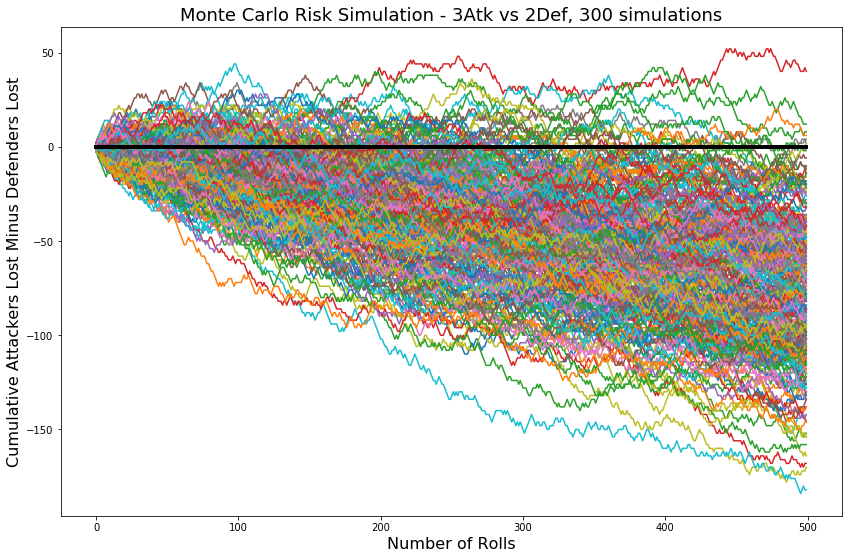

In [32]:
ending_points = {'3v1':[], '3v2':[], '2v2':[], '2v1':[], '1v1':[], '1v2':[]}

n_sims = 300
n_rolls = 500

plt.figure(figsize = [14,9])
plt.title('Monte Carlo Risk Simulation - 3Atk vs 2Def, '+ str(n_sims) + ' simulations', fontdict={'fontsize':18})
plt.ylabel('Cumulative Attackers Lost Minus Defenders Lost', fontdict={'fontsize':16})
plt.xlabel('Number of Rolls', fontdict={'fontsize':16})
for i in np.arange(0,n_sims):
    df3v2 = multi_roll(all_dice,n_rolls)
    df3v1 = atk3_def1(all_dice,n_rolls)
    df2v2 = atk2_def2(all_dice,n_rolls)
    df2v1 = atk2_def1(all_dice,n_rolls)
    df1v2 = atk1_def2(all_dice,n_rolls)
    df1v1 = atk1_def1(all_dice,n_rolls)
    plt.plot(df3v2['SumDefWins'])
    plt.plot([0,n_rolls-1],[0,0], c='k', lw=4)
    ending_points['3v2'].append(df3v2['SumDefWins'].iloc[-1])
    ending_points['3v1'].append(df3v1['SumDefWins'].iloc[-1])
    ending_points['2v2'].append(df2v2['SumDefWins'].iloc[-1])
    ending_points['2v1'].append(df2v1['SumDefWins'].iloc[-1])
    ending_points['1v2'].append(df1v2['SumDefWins'].iloc[-1])
    ending_points['1v1'].append(df1v1['SumDefWins'].iloc[-1])

In [33]:
end_df = pd.DataFrame(ending_points)
end_df = end_df / n_rolls

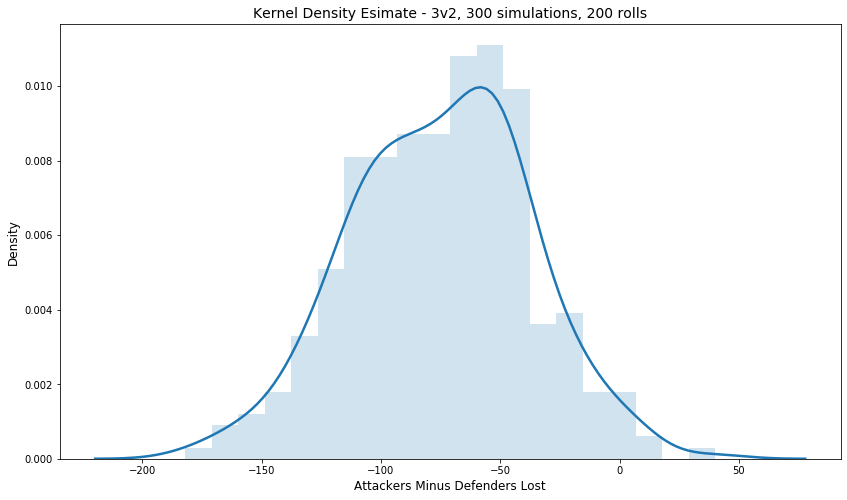

In [34]:
plt.figure(figsize = [14,8])
sns.distplot(ending_points['3v2'], label='3 atk vs. 2 def',bins=20,hist_kws={'alpha':.2}, kde_kws={"color":'C0', 'lw':'2.5'})
plt.ylabel('Density', fontdict={'fontsize':12})
plt.xlabel('Attackers Minus Defenders Lost', fontdict={'fontsize':12})
plt.title('Kernel Density Esimate - 3v2, 300 simulations, 200 rolls', fontdict={'fontsize':14})
#plt.xlim(-1.1,1.1)
plt.show()

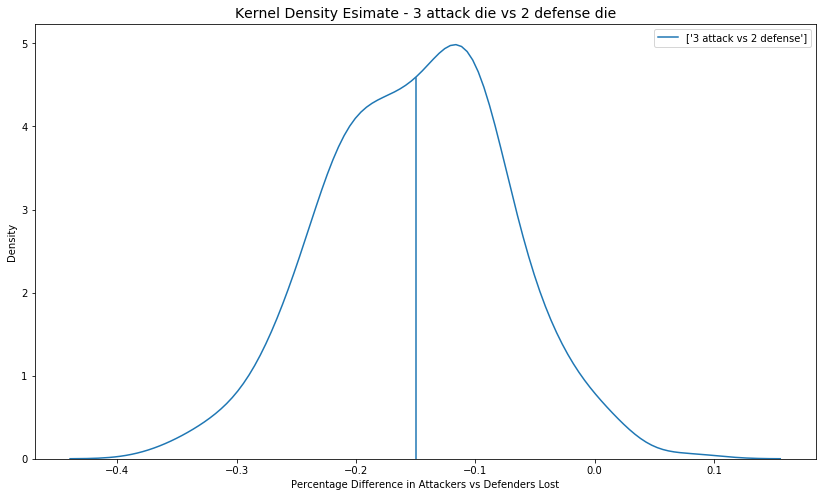

In [46]:
plt.figure(figsize = [14,8])
sns.kdeplot(end_df['3v2'], label=['3 attack vs 2 defense'])
plt.axvline(end_df['3v2'].mean(), ymin=0, ymax=.876)
plt.ylabel('Density')
plt.xlabel('Percentage Difference in Attackers vs Defenders Lost')
plt.title('Kernel Density Esimate - 3 attack die vs 2 defense die', fontdict={'fontsize':14})
#plt.xlim(-.6, .8)
#plt.ylim(0,10)
plt.show()

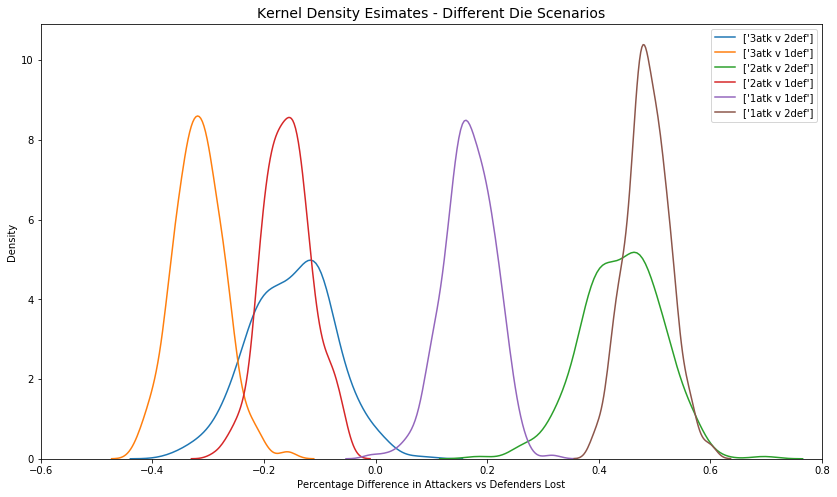

In [47]:
plt.figure(figsize = [14,8])
sns.kdeplot(end_df['3v2'], label=['3atk v 2def'])
sns.kdeplot(end_df['3v1'], label=['3atk v 1def'])
sns.kdeplot(end_df['2v2'], label=['2atk v 2def'])
sns.kdeplot(end_df['2v1'], label=['2atk v 1def'])
sns.kdeplot(end_df['1v1'], label=['1atk v 1def'])
sns.kdeplot(end_df['1v2'], label=['1atk v 2def'])
plt.ylabel('Density')
plt.xlabel('Percentage Difference in Attackers vs Defenders Lost')
plt.title('Kernel Density Esimates - Different Die Scenarios', fontdict={'fontsize':14})
plt.xlim(-.6, .8)
plt.show()

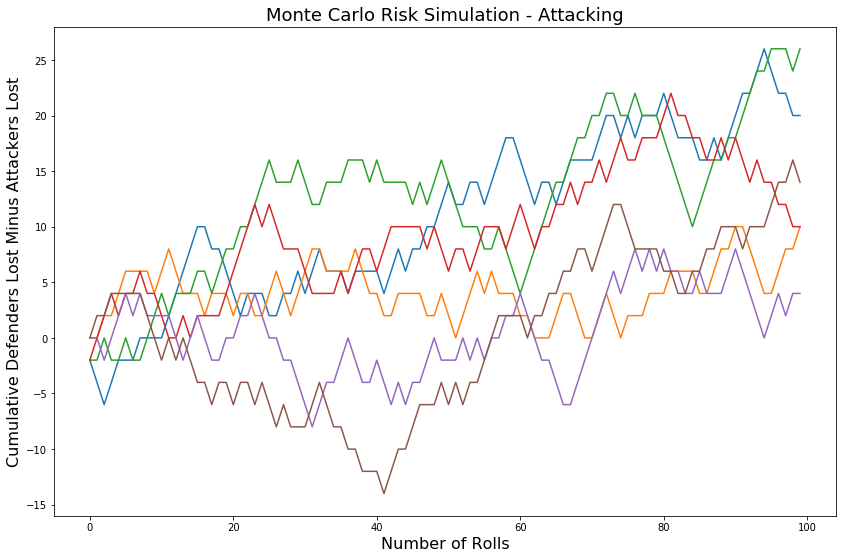

In [17]:
plt.figure(figsize = [14,9])
plt.title('Monte Carlo Risk Simulation - Attacking', fontdict={'fontsize':18})
plt.ylabel('Cumulative Defenders Lost Minus Attackers Lost', fontdict={'fontsize':16})
plt.xlabel('Number of Rolls', fontdict={'fontsize':16})
for i in np.arange(0,6):
    df = multi_roll(all_dice,100)
    plt.plot(df['SumAtkWins'])

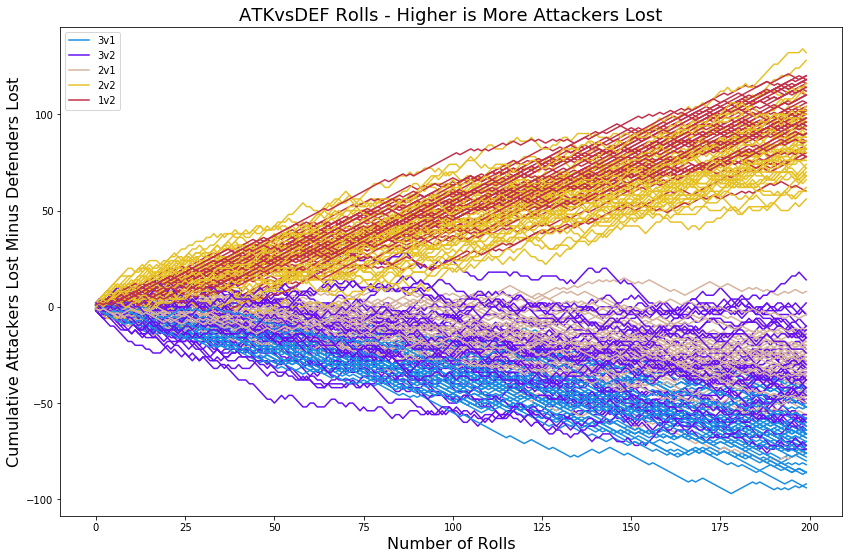

In [15]:
plt.figure(figsize = [14,9])
iterations = 200
plt.title('ATKvsDEF Rolls - Higher is More Attackers Lost', fontdict={'fontsize':18})
plt.ylabel('Cumulative Attackers Lost Minus Defenders Lost', fontdict={'fontsize':16})
plt.xlabel('Number of Rolls', fontdict={'fontsize':16})
for i in np.arange(0,50):
    df = atk3_def1([atk1,atk2,atk3,def1],iterations)
    plt.plot(df['SumDefWins'], color = "#1A8FE3")
    df = multi_roll(all_dice,iterations)
    plt.plot(df['SumDefWins'],  color = '#6610F2')
    df = atk2_def1(all_dice,iterations)
    plt.plot(df['SumDefWins'], color = '#D7B49E')
    df = atk2_def2(all_dice,iterations)
    plt.plot(df['SumDefWins'], color = '#E6C229')
    df = atk1_def2([atk1,def1,def2],iterations)
    plt.plot(df['SumDefWins'], color = '#C33149')
    plt.legend(['3v1', '3v2', '2v1', '2v2', '1v2'])

# Board Project

In this instance, I will explore rolling 2 die on a monopoly board and detect which squares are most frequently landed on. Monopoly has a 40 square loop. The Jail square sends the player to Jail, and they must roll doubles to get out.

In [388]:
d1 = die('d1', 6)
d2 = die('d2', 6)

In [389]:
roll([d1,d2])

[4, 5]

In [390]:
num_games = 10000
num_rolls = 75

positions = []
for game in np.arange(0,num_games):
    
    #set start position
    cur_pos = 0
    
    for each in np.arange(0,num_rolls):

        #calculate the number of spaces to move after rolling 2 die
        spaces = np.sum(roll([d1,d2]))

        #get the current position
        cur_pos = cur_pos + spaces

        #handling jail
        if cur_pos == 30:

            #add landing on 31 to position
            positions.append(cur_pos)

            #move to jail
            new_pos = 10

            #roll for doubles:
            doubles_roll = roll([d1,d2])

            #seek doubles
            while (doubles_roll[0] != doubles_roll[1]):
                doubles_roll = roll([d1,d2])

            #next position
            cur_pos = new_pos + np.sum(doubles_roll)


        #loop around position 40
        if cur_pos > 39:
            cur_pos = cur_pos - 39

        #append the position to the list of positions
        positions.append(cur_pos)
    

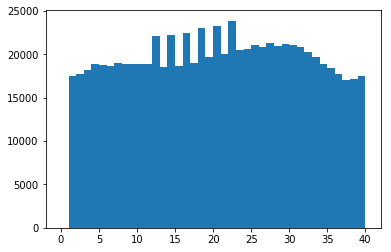

In [391]:
plt.hist(positions, bins = np.arange(0,41,1));